In [1]:
from functions import *
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import shap
from sklearn.model_selection import train_test_split
from collections import Counter

## Data Preprocessing

In [2]:
path_1 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/BHT1.csv"
path_2 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/BHT2.csv"
path_3 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/BHT3.csv"

BHT_1 = pd.read_csv(path_1, sep=';')
BHT_1.drop(columns=['Unnamed: 0'], inplace=True)
BHT_2 = pd.read_csv(path_2, sep=';')
BHT_2.drop(columns=['Unnamed: 0'], inplace=True)
BHT_3 = pd.read_csv(path_3, sep=',')
BHT_3.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
## set modules
module1 = ['M01_1_N', 'M02_1_N', 'M03_1_N', 'M04_1_N', 'M05_1_N', 'M06_1_N']

module2 = [
            'M01_2_N', 'M02_2_N', 'M03_2_N', 'M04_2_N', 'M05_2_N', 'M06_2_N',
            'M07_2_N', 'M08_2_N', 'M09_2_N', 'M10_2_N', 'M11_2_N', 'M12_2_N',]

module3 = ['M01_3_N', 'M02_3_N', 'M03_3_N', 'M04_3_N', 'M05_3_N', 'M06_3_N',
            'M07_3_N', 'M08_3_N', 'M09_3_N', 'M10_3_N', 'M11_3_N', 'M12_3_N',
            'M13_3_N', 'M14_3_N', 'M15_3_N', 'M16_3_N', 'M17_3_N']

### Search Space / Param Grid 

In [4]:
from hyperopt import *
search_space = {
    'criterion': hp.choice('criterion', ['entropy']),           # Choose between Gini & Entropy
    'max_features': hp.choice('max_features', [None]),  # Feature selection method
    'min_impurity_decrease': hp.uniform('min_impurity_decrease', 0.001, 0.03),
    'ccp_alpha': hp.uniform('ccp_alpha', 0.001, 0.02),
    'class_weight': 'balanced',       # Handle class imbalance
}

## BHT semester 1

In [5]:
# Count occurrences of each unique value in the 'status' column
counter_1 = Counter(BHT_1['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_1[1]} | 0: {counter_1[0]}')
hpo = ModelTrainer(random_state=42)
x, y = hpo.split_data(BHT_1, module1)

Quantity of Drop Out and Degree in THL-1: 
 1: 233 | 0: 28


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 53.40trial/s, best loss: -0.6701493598862021]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            03               03
	 actual 1            08               39

Model parameters:
{'ccp_alpha': 0.007231411609268121, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.026047107931859746, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}

Balanced acc.: 66.48936%
Validation accuracy.: 79.24528%
Sensitivity score (for 1): 82.97872%
Specificity score (for 0): 50.00000%
F1 score.: 87.64045%
False prediction: 20.75472%

------------------------------------- Fold 2 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:

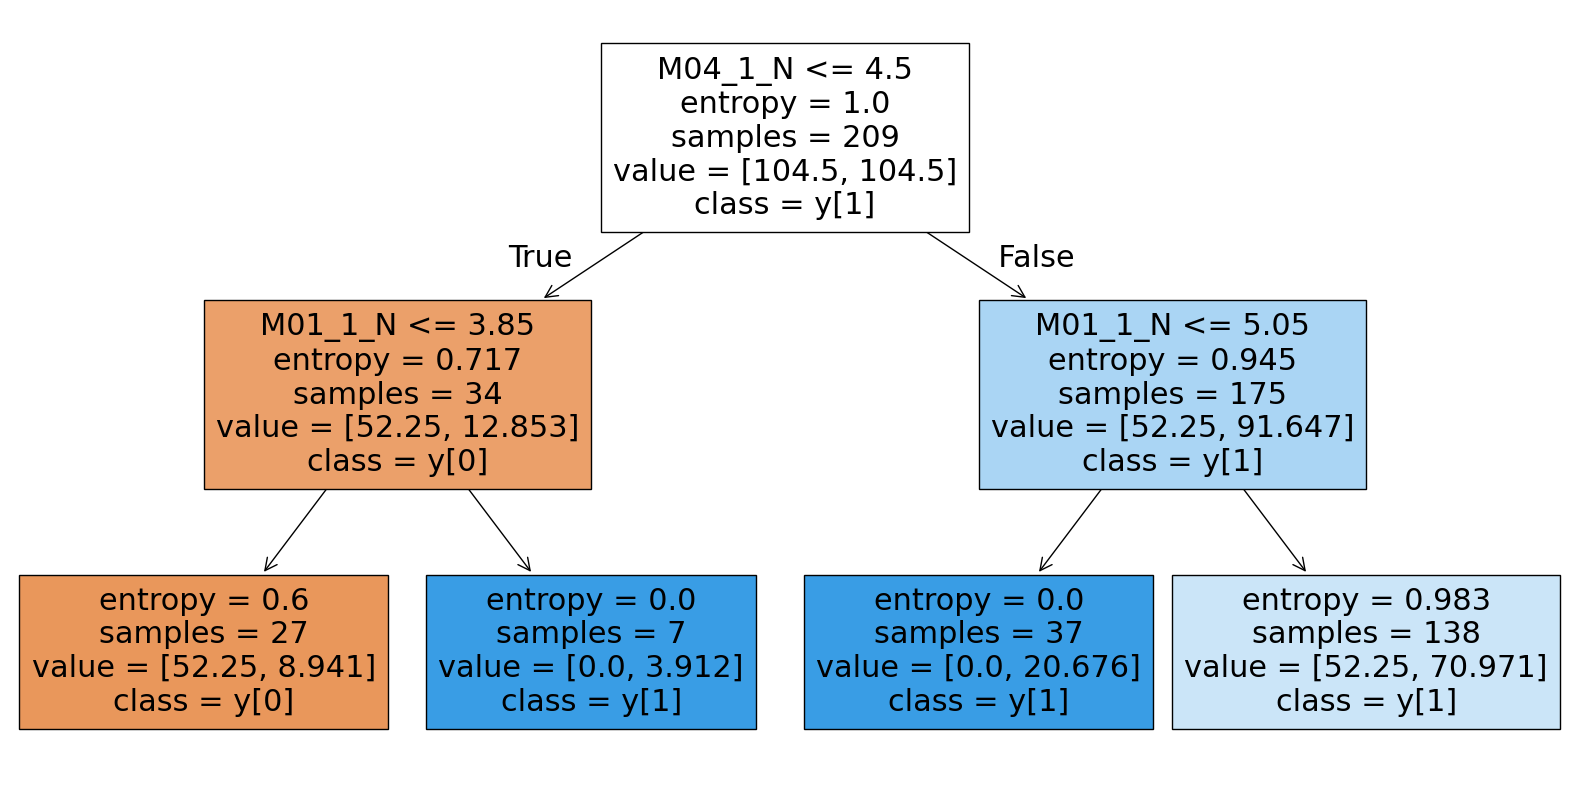

best model is from 4 fold: DecisionTreeClassifier(ccp_alpha=0.018562989411404027, class_weight='balanced',
                       criterion='entropy',
                       min_impurity_decrease=0.028358878682337933,
                       random_state=42)


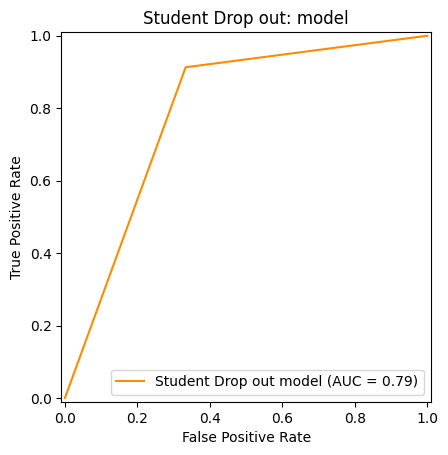

In [6]:
model_1, feature_importance_1 = hpo.cross_validation_hpo(
    x=x, y=y,
    search_space=search_space, 
    folds=5,
    algo='dt'
    )

In [7]:
feature_importance_1

,Feature,Importance
3,M04_1_N,0.514879
0,M01_1_N,0.485121
1,M02_1_N,0.000000
2,M03_1_N,0.000000
4,M05_1_N,0.000000
5,M06_1_N,0.000000


#### Shap analysis

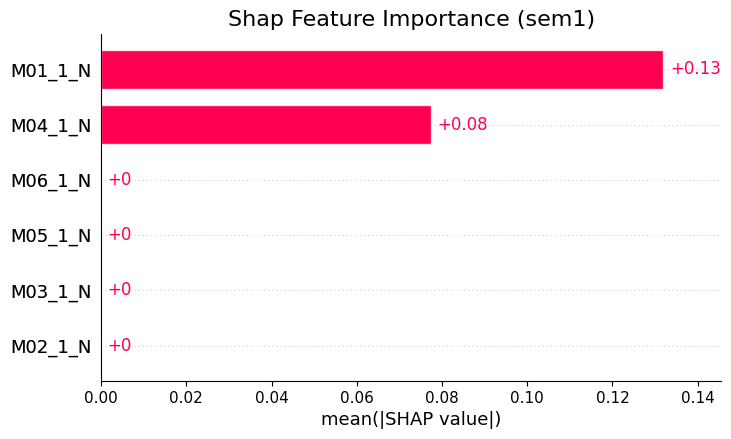

In [8]:
## Shap Global explainations
import shap
explainer = shap.TreeExplainer(model_1['model'], model_1['x_train'])
shap_values = explainer(model_1['x_test'])

plt.title('Shap Feature Importance (sem1)', fontsize=16)
shap.plots.bar(shap_values[...,1])

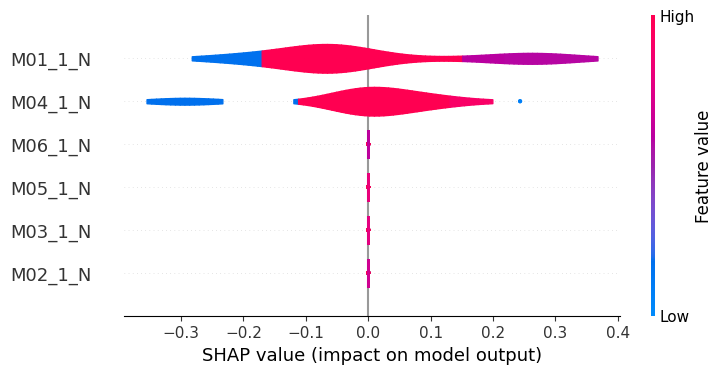

In [9]:
shap.plots.violin(shap_values[...,1], show=True)

In [10]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values[...,1], link='logit')

In [11]:
hpo.plot_shap_force(model=model_1, shap_values=shap_values, student_index=11, link='logit', model_name='dt') 

Student index 11 grades:
         grades
M01_1_N     1.7
M02_1_N     1.7
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     1.0
Status: 1, Prediction: [1], Probability [0]: 0.000, Probability [1]: 1.000


In [12]:
hpo.plot_shap_force(model=model_1, shap_values=shap_values, student_index=24, link='logit', model_name='dt') 

Student index 24 grades:
         grades
M01_1_N     2.7
M02_1_N     3.0
M03_1_N     1.0
M04_1_N     5.1
M05_1_N     2.3
M06_1_N     3.3
Status: 1, Prediction: [1], Probability [0]: 0.000, Probability [1]: 1.000


In [13]:
hpo.plot_shap_force(model=model_1, shap_values=shap_values, student_index=10, link='logit', model_name='dt') 

Student index 10 grades:
         grades
M01_1_N     5.1
M02_1_N     5.1
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.424, Probability [1]: 0.576


## BHT semester 2 

In [14]:
# Count occurrences of each unique value in the 'status' column
counter_2 = Counter(BHT_2['status'])
print(f'Quantity of Drop Out and Degree in THL-2: \n 1: {counter_2[1]} | 0: {counter_2[0]}')
hpo2 = ModelTrainer(random_state=42)
x2, y2 = hpo2.split_data(BHT_2, module2)

Quantity of Drop Out and Degree in THL-2: 
 1: 156 | 0: 27


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 48.54trial/s, best loss: -0.6313333333333333]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            02               03
	 actual 1            03               29

Model parameters:
{'ccp_alpha': 0.0046249569944396066, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.01930111253665046, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}

Balanced acc.: 65.31250%
Validation accuracy.: 83.78378%
Sensitivity score (for 1): 90.62500%
Specificity score (for 0): 40.00000%
F1 score.: 90.62500%
False prediction: 16.21622%

------------------------------------- Fold 2 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:

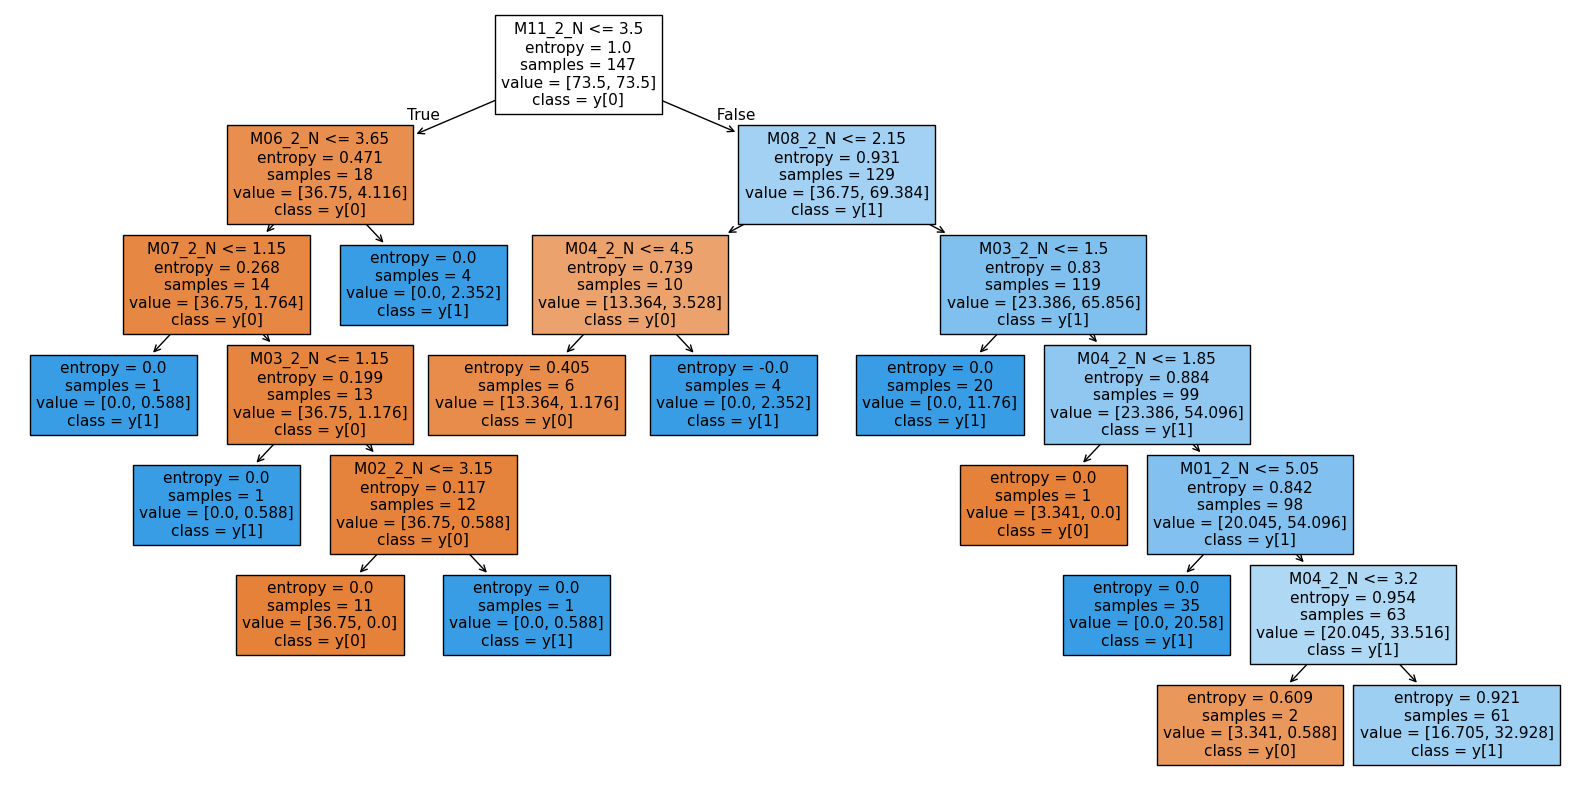

best model is from 5 fold: DecisionTreeClassifier(ccp_alpha=0.018314473402549665, class_weight='balanced',
                       criterion='entropy',
                       min_impurity_decrease=0.017233250456840543,
                       random_state=42)


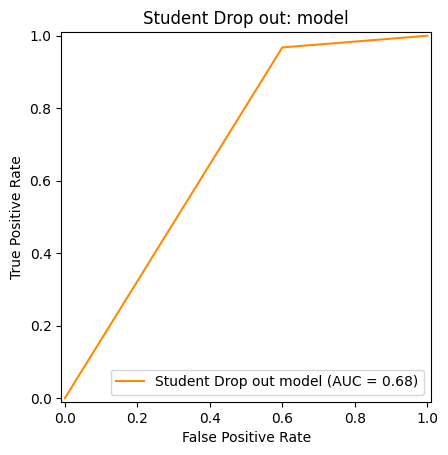

In [15]:
models_2, feature_importance_2 = hpo2.cross_validation_hpo(
    x=x2, y=y2,
    search_space=search_space, 
    folds=5,
    algo='dt'
    )

In [16]:
feature_importance_2

,Feature,Importance
10,M11_2_N,0.311510
3,M04_2_N,0.167653
7,M08_2_N,0.131569
0,M01_2_N,0.121912
5,M06_2_N,0.096003
2,M03_2_N,0.094641
1,M02_2_N,0.046924
6,M07_2_N,0.029787
4,M05_2_N,0.000000
8,M09_2_N,0.000000


#### Shap analysis

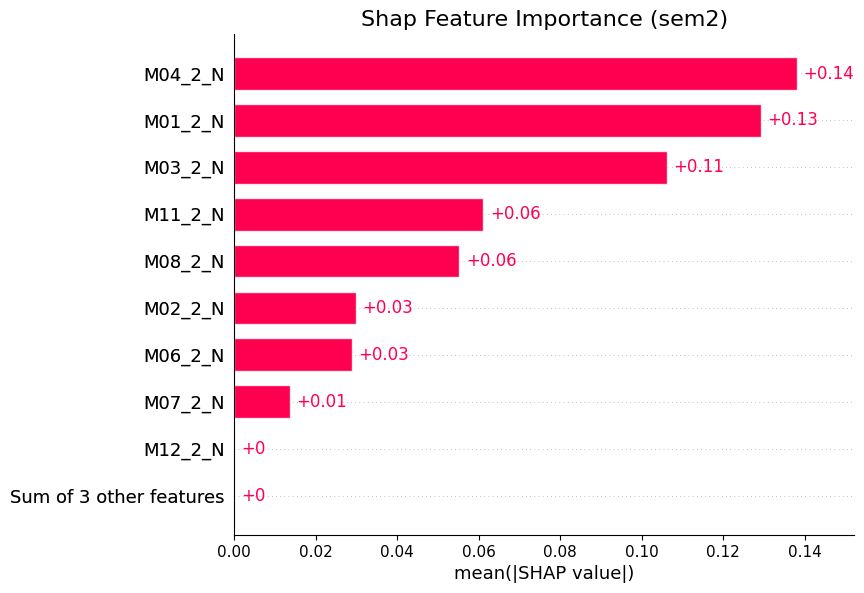

In [17]:
## Shap Global explainations
import shap
explainer2 = shap.TreeExplainer(models_2['model'], models_2['x_train'])
shap_values2 = explainer2(models_2['x_test'])

plt.title('Shap Feature Importance (sem2)', fontsize=16)
shap.plots.bar(shap_values2[...,1])

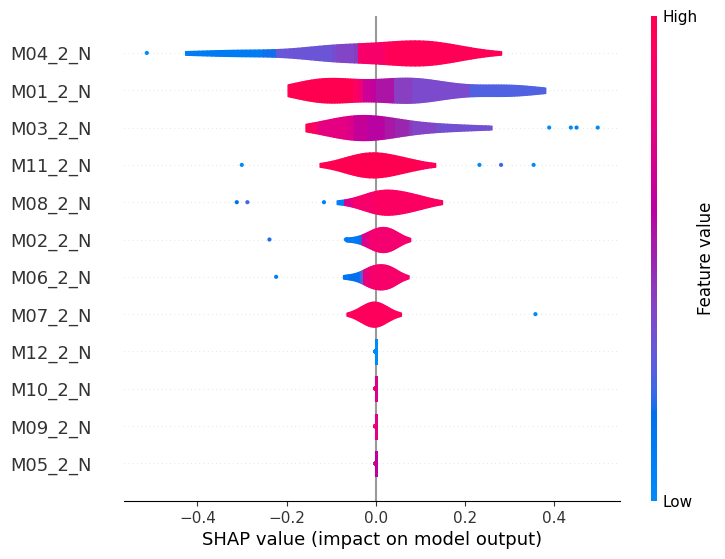

In [18]:
shap.plots.violin(shap_values2[...,1], show=True)

In [19]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values2[...,1], link='logit')

In [20]:
hpo2.plot_shap_force(model=models_2, shap_values=shap_values2, student_index=14, link='logit', model_name='dt')

Student index 14 grades:
         grades
M01_2_N     1.0
M02_2_N     1.7
M03_2_N     1.0
M04_2_N     3.7
M05_2_N     1.7
M06_2_N     2.0
M07_2_N     1.3
M08_2_N     1.3
M09_2_N     1.0
M10_2_N     1.7
M11_2_N     2.0
M12_2_N     5.1
Status: 0, Prediction: [1], Probability [0]: 0.000, Probability [1]: 1.000


In [21]:
hpo2.plot_shap_force(model=models_2, shap_values=shap_values2, student_index=11, link='logit', model_name='dt')

Student index 11 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 0, Prediction: [1], Probability [0]: 0.337, Probability [1]: 0.663


In [22]:
hpo2.plot_shap_force(model=models_2, shap_values=shap_values2, student_index=2, link='logit', model_name='dt')

Student index 2 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.337, Probability [1]: 0.663


In [23]:
hpo2.plot_shap_force(model=models_2, shap_values=shap_values2, student_index=5, link='logit', model_name='dt')

Student index 5 grades:
         grades
M01_2_N     2.3
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     2.0
M05_2_N     5.1
M06_2_N     2.3
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.000, Probability [1]: 1.000


## BHT semester 3

In [24]:
# Count occurrences of each unique value in the 'status' column
counter_3 = Counter(BHT_3['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_3[1]} | 0: {counter_3[0]}')
hpo3 = ModelTrainer(random_state=72)
x3, y3 = hpo3.split_data(BHT_3, module3)

Quantity of Drop Out and Degree in THL-1: 
 1: 114 | 0: 26


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 32.66trial/s, best loss: -0.6683625730994152]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            02               03
	 actual 1            04               19

Model parameters:
{'ccp_alpha': 0.008615680923285293, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.024144419627551084, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 72, 'splitter': 'best'}

Balanced acc.: 61.30435%
Validation accuracy.: 75.00000%
Sensitivity score (for 1): 82.60870%
Specificity score (for 0): 40.00000%
F1 score.: 84.44444%
False prediction: 25.00000%

------------------------------------- Fold 2 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:

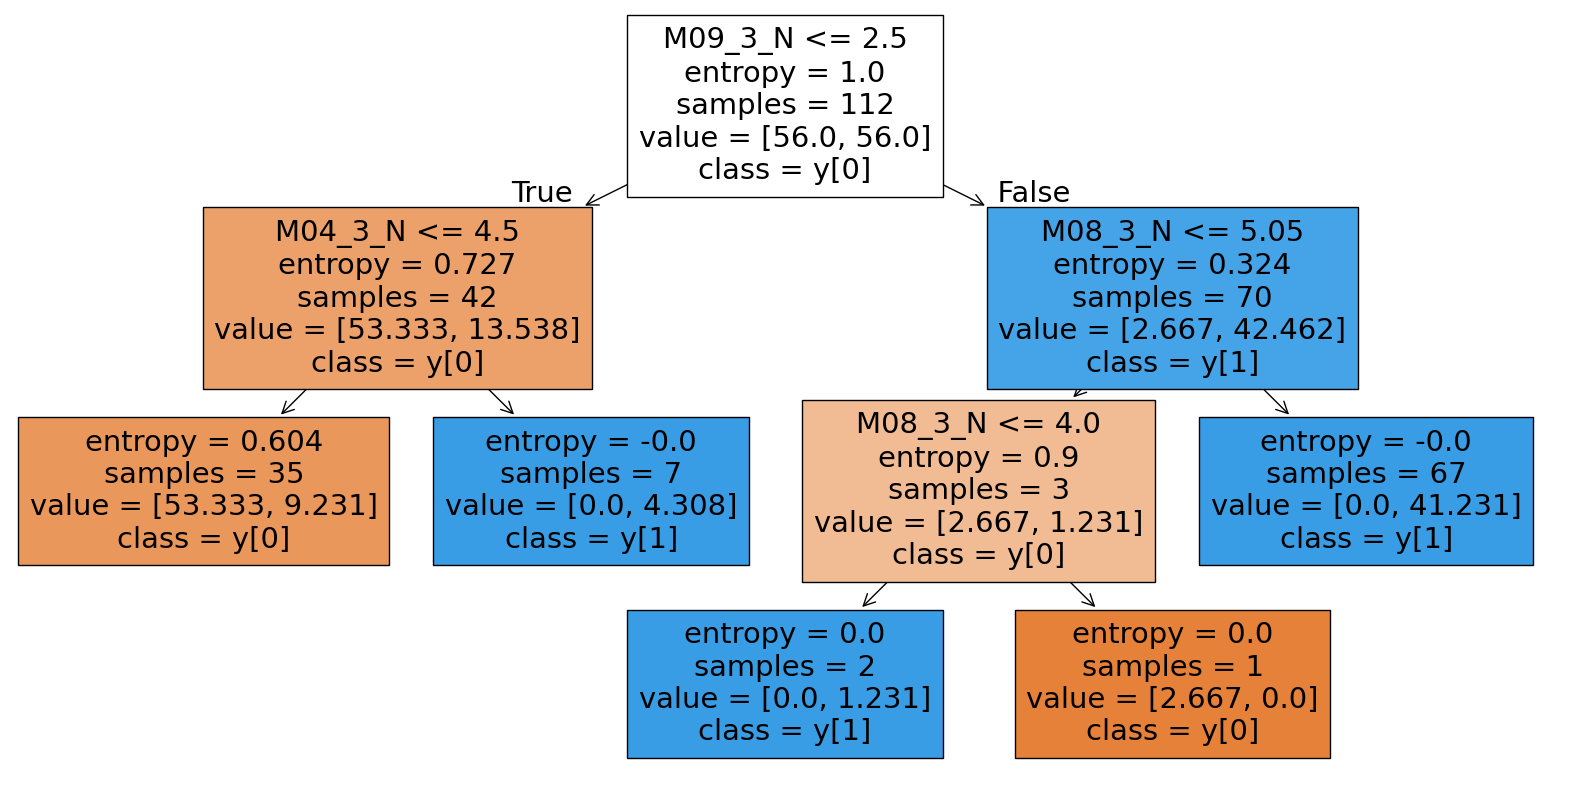

best model is from 4 fold: DecisionTreeClassifier(ccp_alpha=0.007982008833481245, class_weight='balanced',
                       criterion='entropy',
                       min_impurity_decrease=0.02534905284411868,
                       random_state=72)


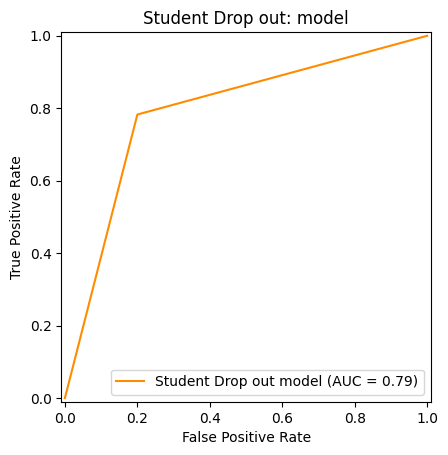

In [25]:
models_3, feature_importance_3 = hpo3.cross_validation_hpo(
    x=x3, y=y3,
    search_space=search_space, 
    folds=5,
    algo='dt'
    )

In [26]:
feature_importance_3

,Feature,Importance
8,M09_3_N,0.657164
7,M08_3_N,0.196862
3,M04_3_N,0.145974
10,M11_3_N,0.000000
15,M16_3_N,0.000000
14,M15_3_N,0.000000
13,M14_3_N,0.000000
12,M13_3_N,0.000000
11,M12_3_N,0.000000
0,M01_3_N,0.000000


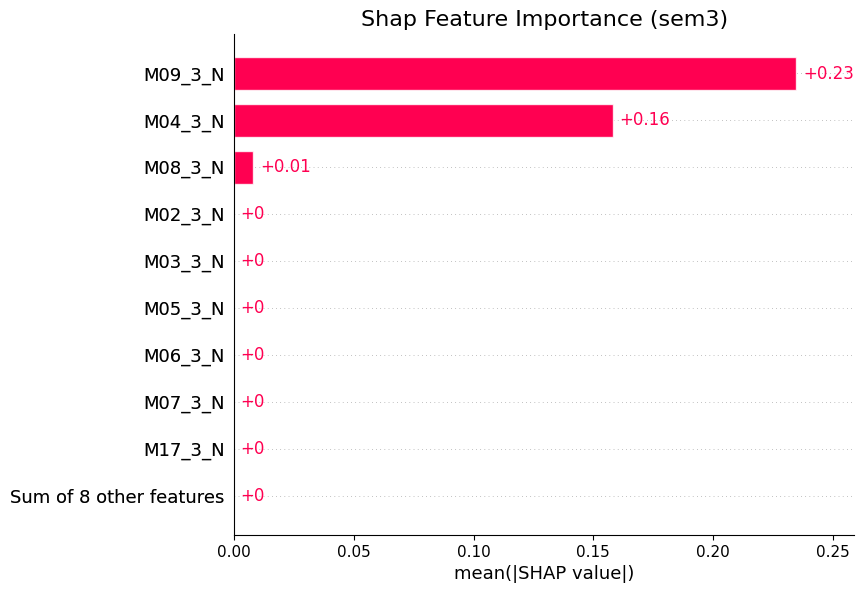

In [27]:
## Shap Global explainations
import shap
explainer3 = shap.TreeExplainer(models_3['model'], models_3['x_train'])
shap_values3 = explainer3(models_3['x_test'])

plt.title('Shap Feature Importance (sem3)', fontsize=16)
shap.plots.bar(shap_values3[..., 1])

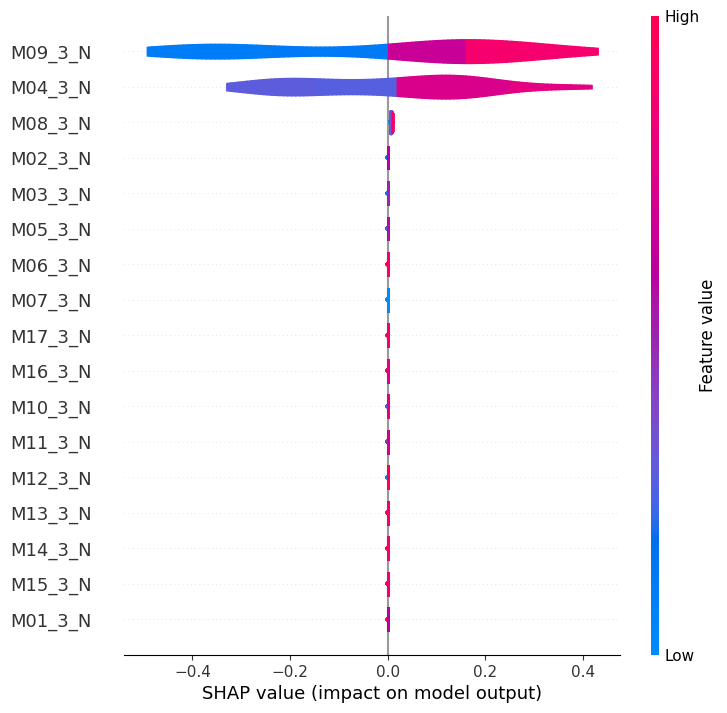

In [28]:
shap.plots.violin(shap_values3[..., 1], show=True)

In [29]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values3[..., 1], link='identity')

In [30]:
hpo3.plot_shap_force(model=models_3, shap_values=shap_values3, student_index=1, link='identity', model_name='dt')

Student index 1 grades:
         grades
M01_3_N     1.7
M02_3_N     2.7
M03_3_N     1.0
M04_3_N     1.7
M05_3_N     2.0
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     1.3
M09_3_N     1.3
M10_3_N     2.3
M11_3_N     2.7
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.0
M16_3_N     2.0
M17_3_N     3.0
Status: 1, Prediction: [0], Probability [0]: 0.852, Probability [1]: 0.148


In [31]:
hpo3.plot_shap_force(model=models_3, shap_values=shap_values3, student_index=4, link='identity', model_name='dt')

Student index 4 grades:
         grades
M01_3_N     5.1
M02_3_N     5.1
M03_3_N     5.1
M04_3_N     5.1
M05_3_N     5.1
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     5.1
M10_3_N     5.1
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.000, Probability [1]: 1.000


In [32]:
hpo3.plot_shap_force(model=models_3, shap_values=shap_values3, student_index=14, link='identity', model_name='dt')

Student index 14 grades:
         grades
M01_3_N     2.3
M02_3_N     5.1
M03_3_N     5.1
M04_3_N     5.1
M05_3_N     5.1
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     5.1
M10_3_N     5.1
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.000, Probability [1]: 1.000


In [33]:
hpo3.plot_shap_force(model=models_3, shap_values=shap_values3, student_index=24, link='identity', model_name='dt')

Student index 24 grades:
         grades
M01_3_N     1.0
M02_3_N     1.0
M03_3_N     1.0
M04_3_N     1.7
M05_3_N     5.1
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     5.1
M10_3_N     5.1
M11_3_N     5.1
M12_3_N     1.3
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.000, Probability [1]: 1.000
